<a href="https://colab.research.google.com/github/NadiaHolmlund/Semester_Project/blob/main/Semester_Project_PoC_Streamlit_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
# Pip installs
!pip install -q transformers==4.28.0 # Installing version 4.28.0 to circumvent an issue with Accelerator and the introduction of PartialState in later versions
!pip install -q transformers datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 55.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 96.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 42.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 12.5 MB/s eta 0:00:00


In [2]:
# Libraries
import pandas as pd
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt
from transformers import DeiTImageProcessor, DeiTForImageClassification

# Connecting to Google Drive

Images for the datasets are stored on Google Drive.

In [3]:
# Connecting to Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# Copying gdrive to Google Colab
%cd /content/gdrive/MyDrive/Semester_Project

/content/gdrive/MyDrive/Semester_Project


# Loading the fine-tuned model

In [5]:
# Loading the image processor and fine-tuned model from HuggingFace
processor = DeiTImageProcessor.from_pretrained('facebook/deit-base-distilled-patch16-224')
model = DeiTForImageClassification.from_pretrained('NadiaHolmlund/Semester_Project', num_labels= 7, ignore_mismatched_sizes=True)

Some weights of the model checkpoint at NadiaHolmlund/Semester_Project were not used when initializing DeiTForImageClassification: ['deit.pooler.dense.weight', 'deit.pooler.dense.bias']
- This IS expected if you are initializing DeiTForImageClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DeiTForImageClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [6]:
# Creating a dictionary connecting the emotion_id and emotion_label
emotion_id = [0, 1, 2, 3, 4, 5, 6]
emotion_label = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Sadness', 'Surprise', 'Neutral']

id2label = {id: label for id, label in zip(emotion_id, emotion_label)}
label2id = {label: id for id, label in id2label.items()}

In [7]:
# Defining a function to predict the class and add a column with class_id and class_label
def predict_class(dataset):
    class_id = []
    class_label = []
    
    for image in dataset['image']:
        inputs = processor(images=image, return_tensors="pt")
        outputs = model(**inputs)
        logits = outputs.logits
        
        predicted_class_idx = logits.argmax(-1).item()
        predicted_class_label = id2label[predicted_class_idx]
        
        class_id.append(predicted_class_idx)
        class_label.append(predicted_class_label)
    
    dataset['class_id'] = class_id
    dataset['class_label'] = class_label
    return dataset


# Creating datasets for Streamlit PoC

Datasets are created for each of the avatars (Nadia, Nicklas and Nikolaj).

The datasets include webcam snapshots, information related to the users as well as their respective browser history.

## Avatar: Nadia

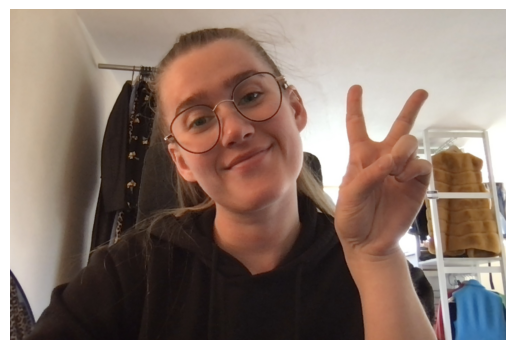

In [8]:
# Displaying a webcam snapshot
# Specifying the path to the image in Google Drive
image_path = '/content/gdrive/MyDrive/Semester_Project/MoodTrackr DEMO/Nadia/Photo on 21-05-2023 at 14.01.jpg'

# Opening the image using PIL
img = Image.open(image_path)

# Displaying the image using matplotlib
plt.imshow(img)
plt.axis('off')
plt.show()

In [29]:
# Loading the webcam snapshots into a dataframe
folder_path = '/content/gdrive/MyDrive/Semester_Project/MoodTrackr DEMO/Nadia'
file_list = os.listdir(folder_path)
image_files = [filename for filename in file_list if filename.endswith(('.jpg', '.jpeg', '.png'))]

df_img = pd.DataFrame()

for filename in image_files:
    image_path = os.path.join(folder_path, filename)
    img = Image.open(image_path)
    img_array = np.array(img)
    df_img = df_img.append({'image': img_array}, ignore_index=True)


<ipython-input-29-3983c69a4e46>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_img = df_img.append({'image': img_array}, ignore_index=True)
<ipython-input-29-3983c69a4e46>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_img = df_img.append({'image': img_array}, ignore_index=True)
<ipython-input-29-3983c69a4e46>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_img = df_img.append({'image': img_array}, ignore_index=True)
<ipython-input-29-3983c69a4e46>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_img = df_img.append({'image': img_array}, ignore_index=True)
<ipython-input-29-3983c69a4e46>:12: FutureWarning: The frame

In [41]:
# Defining user information and browser history (fabricated for PoC purposes)
df_data = pd.DataFrame({'user_id':          ['0001'] * 15,
                        'user_name':        ['Nadia'] * 15,
                        'date':             ['21-05-2023'] * 15,
                        'timestamp':        ['08:30',         '09:00',          '10:00',          '10:30',           '11:00',           '11:30',       '12:00',         '14:00',          '14:30',         '15:00',       '15:30',         '16:00',          '21:30',        '22:00',          '22:30'],
                        'website':          ['Google Colab',  'Google Colab',   'Teams',          'Teams',           'Stack Overflow',  'ChatGPT',     'Facebook',      'TikTok',         'Google Colab',  'ChatGPT',     'YouTube',       'GitHub',         'Facebook',     'TikTok',         'TikTok'],
                        'website_cat':      ['Notebook',      'Notebook',       'Productivity',   'Productivity',    'Q&A Forum',       'AI Chatbot',  'Social Media',  'Social Media',   'Notebook',      'AI Chatbot',  'Social Media',  'Productivity',   'Social Media', 'Social Media',   'Social Media'],
                        'website_dur_min':  [20,               30,               15,               30,                15,                20,            15,              30,               30,              20,            30,              20,               15,             30,               30],
})

In [43]:
# Merging the user information with the webcam snapshots
df_merged = pd.concat([df_data, df_img], axis=1)

In [44]:
# Examining the dataframe
df_merged.head()

,user_id,user_name,date,timestamp,website,website_cat,website_dur_min,image
0,0001,Nadia,21-05-2023,08:30,Google Colab,Notebook,20,"[[[199, 178, 151], [199, 178, 151], [199, 178,..."
1,0001,Nadia,21-05-2023,09:00,Google Colab,Notebook,30,"[[[199, 179, 154], [199, 179, 154], [199, 179,..."
2,0001,Nadia,21-05-2023,10:00,Teams,Productivity,15,"[[[191, 171, 147], [191, 171, 147], [190, 170,..."
3,0001,Nadia,21-05-2023,10:30,Teams,Productivity,30,"[[[201, 176, 146], [201, 176, 146], [201, 176,..."
4,0001,Nadia,21-05-2023,11:00,Stack Overflow,Q&A Forum,15,"[[[190, 169, 142], [189, 168, 141], [189, 168,..."


In [47]:
# Predicting the emotion class of each image and adding class_id and class_label columns to the dataframe
nadia_df = predict_class(df_merged)

In [48]:
# Examining the dataframe
nadia_df

,user_id,user_name,date,timestamp,website,website_cat,website_dur_min,image,class_id,class_label
0,0001,Nadia,21-05-2023,08:30,Google Colab,Notebook,20,"[[[199, 178, 151], [199, 178, 151], [199, 178,...",3,Happiness
1,0001,Nadia,21-05-2023,09:00,Google Colab,Notebook,30,"[[[199, 179, 154], [199, 179, 154], [199, 179,...",3,Happiness
2,0001,Nadia,21-05-2023,10:00,Teams,Productivity,15,"[[[191, 171, 147], [191, 171, 147], [190, 170,...",6,Neutral
3,0001,Nadia,21-05-2023,10:30,Teams,Productivity,30,"[[[201, 176, 146], [201, 176, 146], [201, 176,...",4,Sadness
4,0001,Nadia,21-05-2023,11:00,Stack Overflow,Q&A Forum,15,"[[[190, 169, 142], [189, 168, 141], [189, 168,...",3,Happiness
5,0001,Nadia,21-05-2023,11:30,ChatGPT,AI Chatbot,20,"[[[201, 180, 151], [201, 180, 151], [201, 180,...",3,Happiness
6,0001,Nadia,21-05-2023,12:00,Facebook,Social Media,15,"[[[214, 197, 171], [214, 197, 171], [214, 197,...",3,Happiness
7,0001,Nadia,21-05-2023,14:00,TikTok,Social Media,30,"[[[183, 159, 133], [183, 159, 133], [183, 159,...",2,Fear
8,0001,Nadia,21-05-2023,14:30,Google Colab,Notebook,30,"[[[149, 128, 101], [150, 129, 102], [150, 129,...",6,Neutral
9,0001,Nadia,21-05-2023,15:00,ChatGPT,AI Chatbot,20,"[[[142, 126, 92], [141, 125, 91], [141, 125, 9...",6,Neutral


In [50]:
# Saving the dataframe as a csv which is then uploaded on GitHub to be imported into Streamlit for PoC
nadia_df.to_csv('/content/gdrive/MyDrive/Semester_Project/MoodTrackr DEMO/Nadia/nadia_df.csv', index=False)

## Avatar: Nicklas

## Avatar: Nikolaj